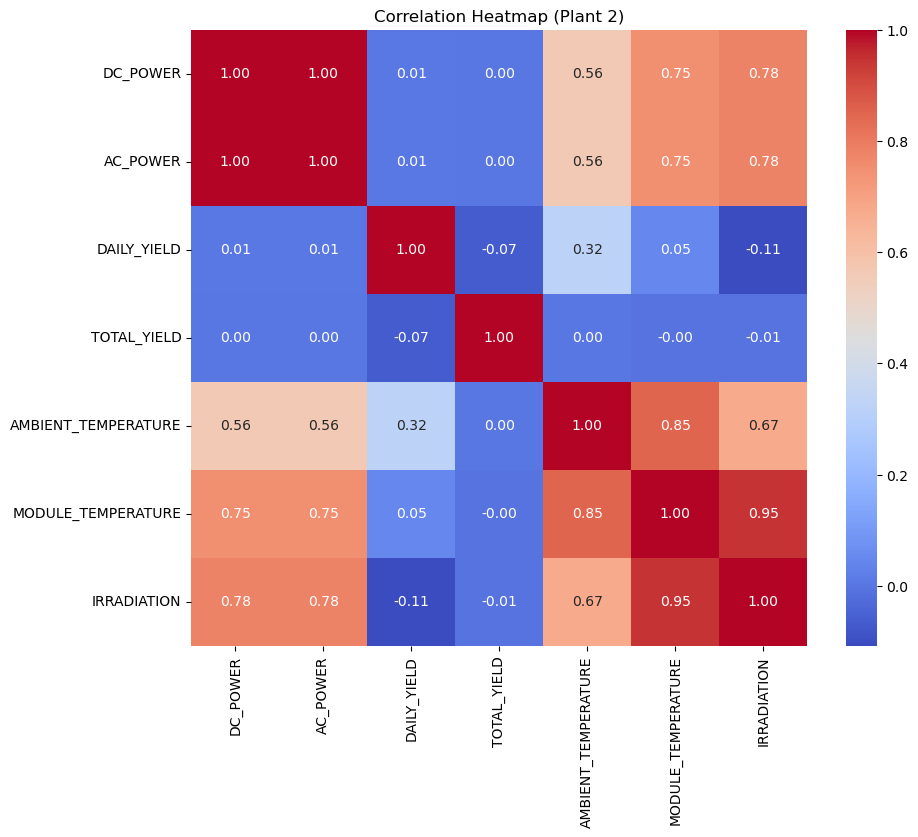

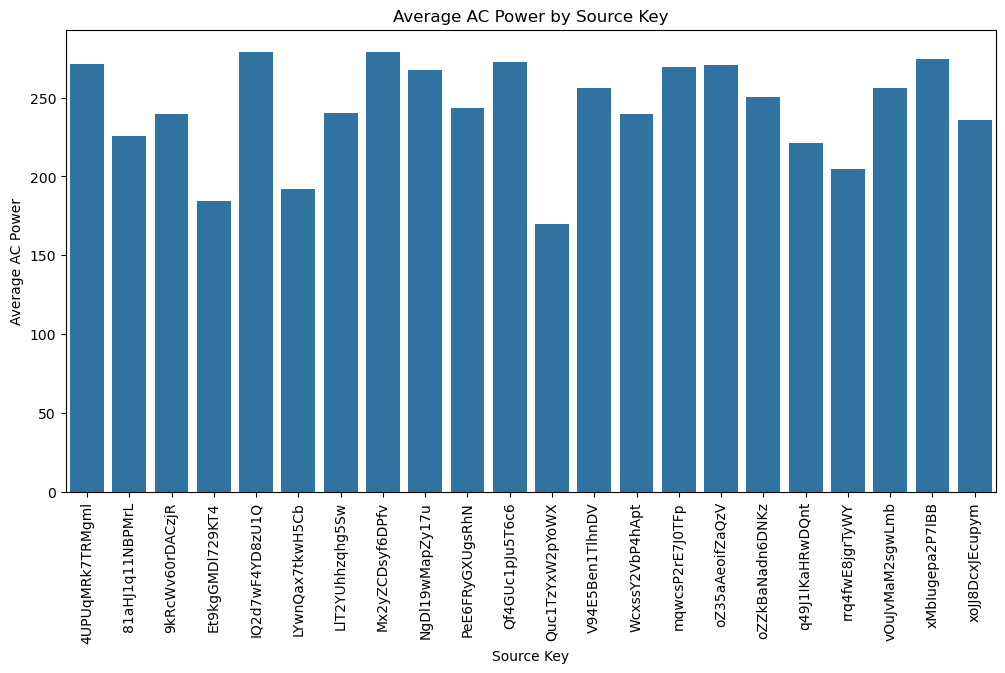

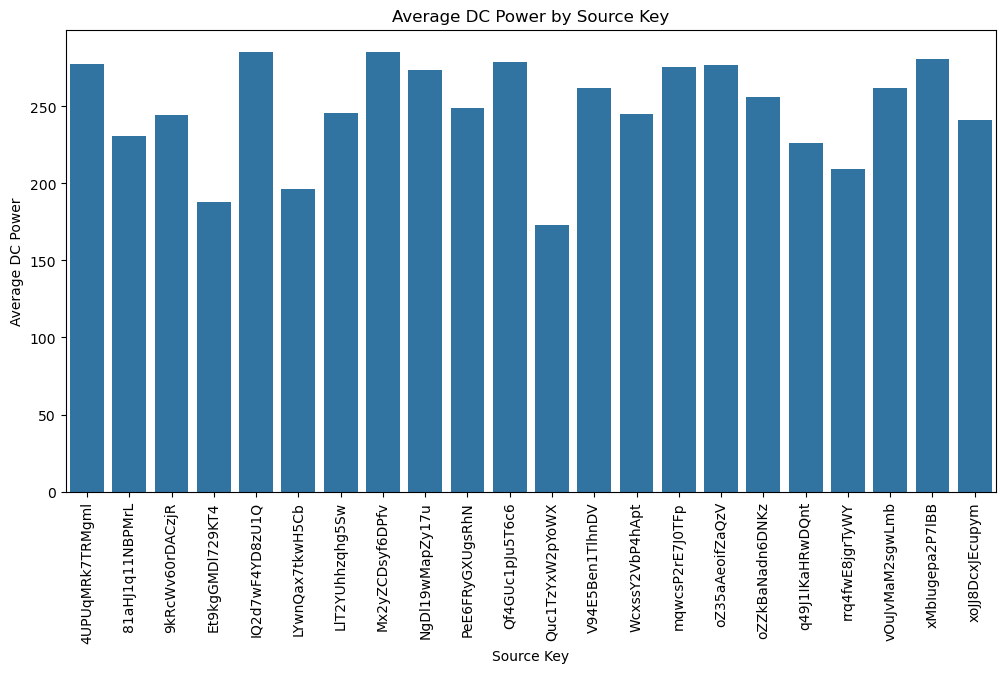

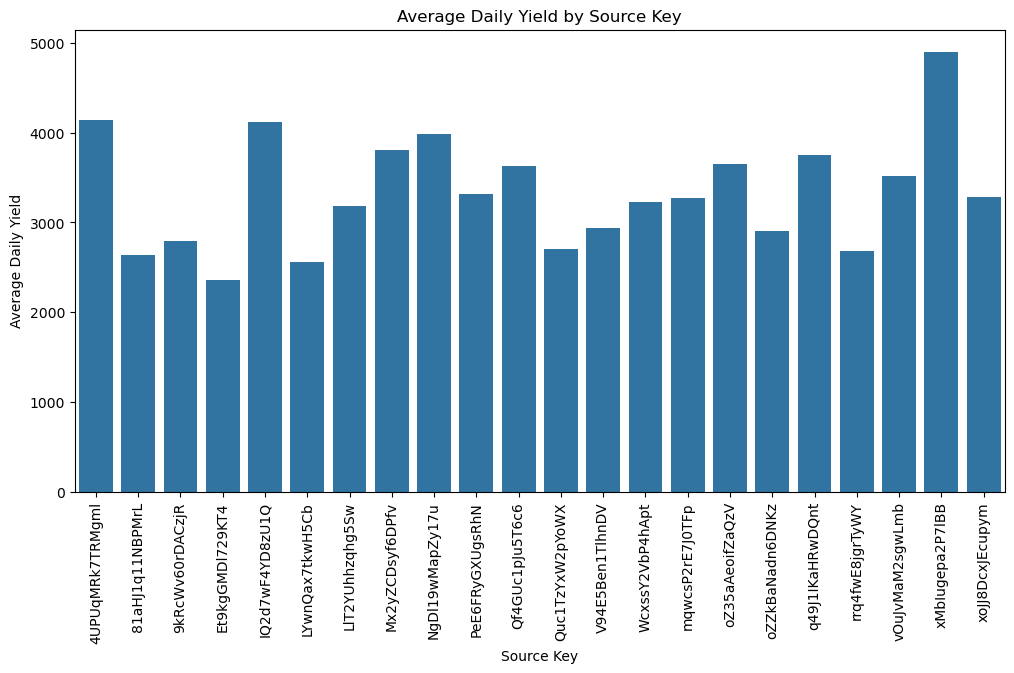

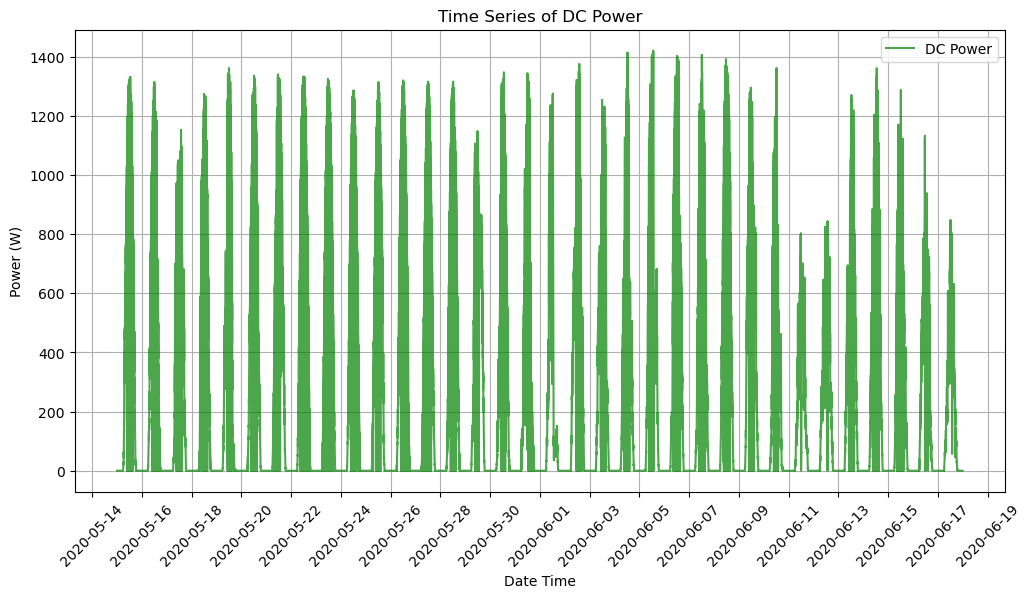

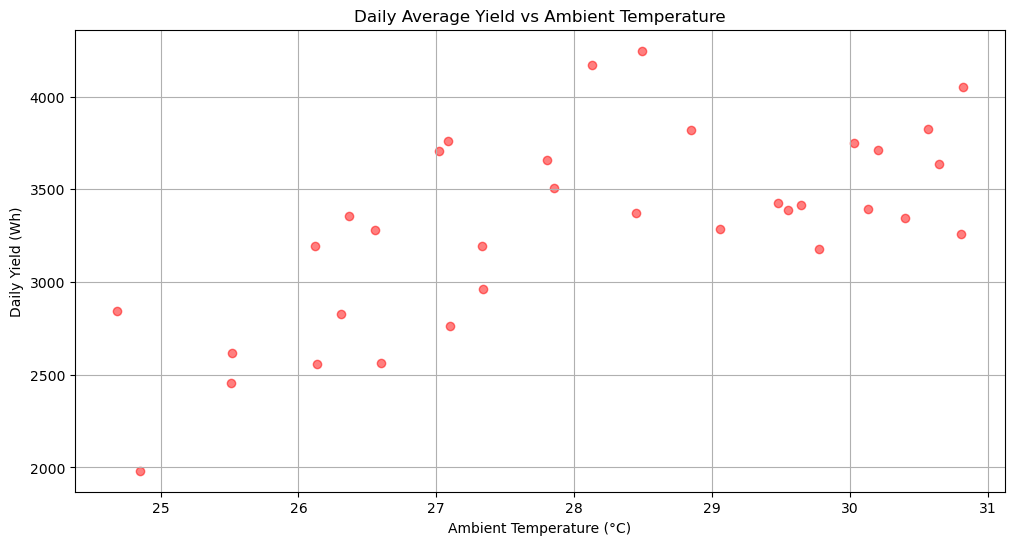

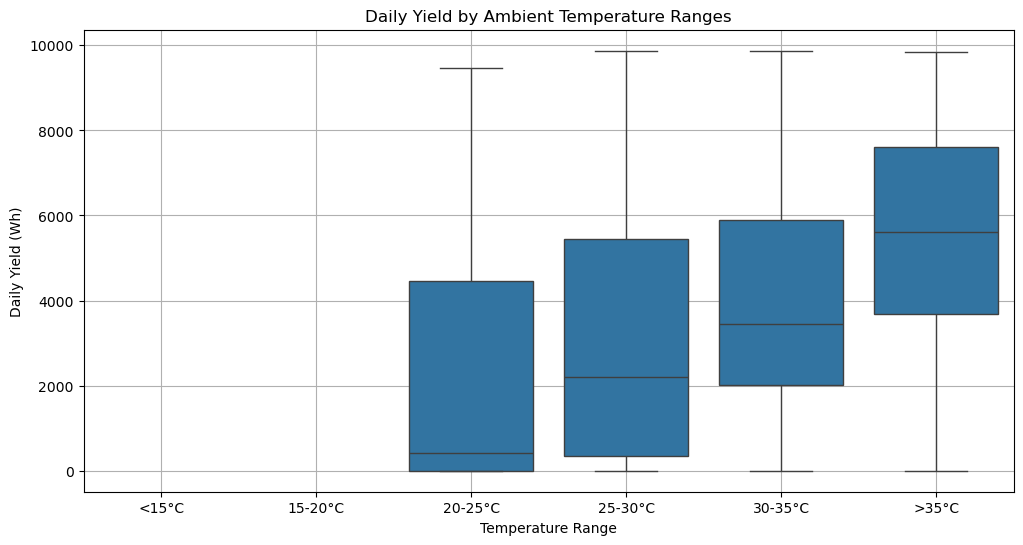

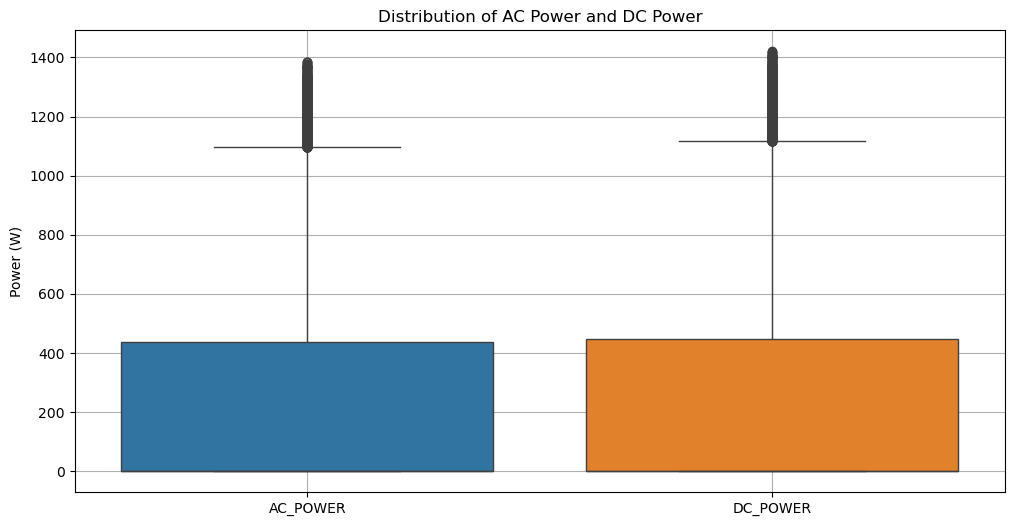

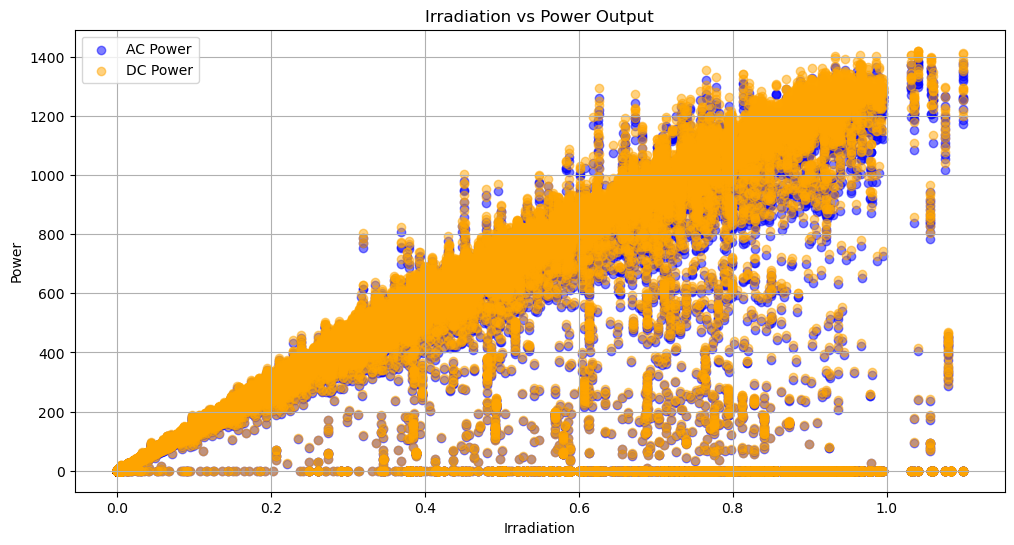

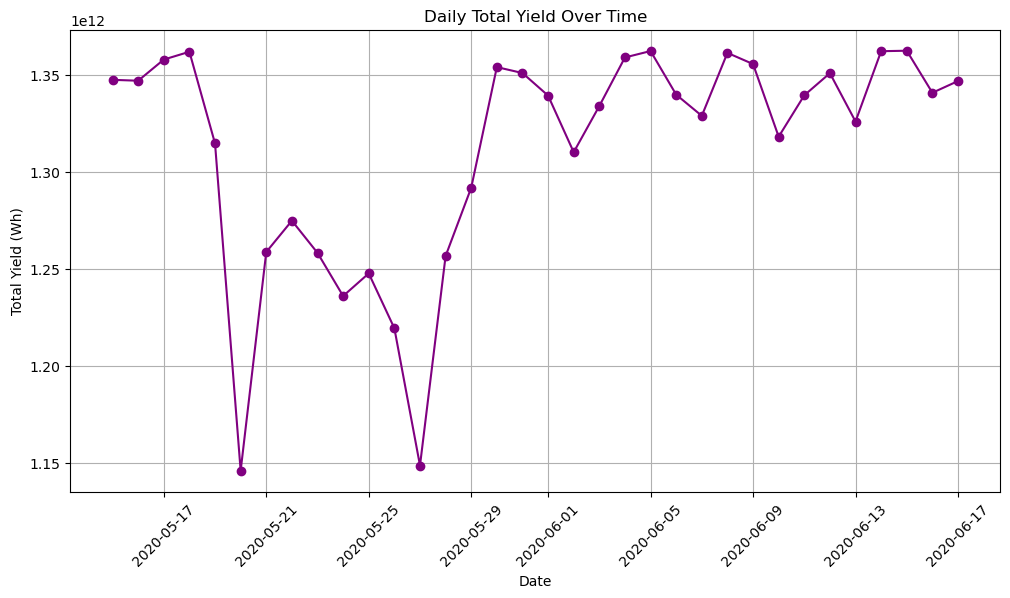

In [7]:
# Import necessary libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore")

# Load merged data
plant2_data = pd.read_csv('Merged_data.csv')

#datetime convt code
plant2_data['DATE_TIME'] = pd.to_datetime(plant2_data['DATE_TIME'])

# Correlation Heatmap
correlation_matrix = plant2_data[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
                                  'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Plant 2)')
plt.show()

# Average AC/DC Power by Source Key
source_key_ac = plant2_data.groupby('SOURCE_KEY')['AC_POWER'].mean()
source_key_dc = plant2_data.groupby('SOURCE_KEY')['DC_POWER'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=source_key_ac.index, y=source_key_ac.values)
plt.title('Average AC Power by Source Key')
plt.xlabel('Source Key')
plt.ylabel('Average AC Power')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=source_key_dc.index, y=source_key_dc.values)
plt.title('Average DC Power by Source Key')
plt.xlabel('Source Key')
plt.ylabel('Average DC Power')
plt.xticks(rotation=90)
plt.show()

# Average Daily and Total Yield by Source Key
source_key_yield = plant2_data.groupby('SOURCE_KEY').agg({'DAILY_YIELD': 'mean', 'TOTAL_YIELD': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=source_key_yield['SOURCE_KEY'], y=source_key_yield['DAILY_YIELD'])
plt.title('Average Daily Yield by Source Key')
plt.xlabel('Source Key')
plt.ylabel('Average Daily Yield')
plt.xticks(rotation=90)
plt.show()

# Time Series of DC Power
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(12, 6))
plt.plot(plant2_data['DATE_TIME'], plant2_data['DC_POWER'], label='DC Power', color='green', alpha=0.7)
plt.title('Time Series of DC Power')
plt.xlabel('Date Time')
plt.ylabel('Power (W)')
locator=MaxNLocator(nbins=20)
plt.gca().xaxis.set_major_locator(locator)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Daily Average Yield vs Ambient Temperature
daily_avg = plant2_data.groupby(plant2_data['DATE_TIME'].dt.date).agg({
    'DAILY_YIELD': 'mean',
    'AMBIENT_TEMPERATURE': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(daily_avg['AMBIENT_TEMPERATURE'], daily_avg['DAILY_YIELD'], color='red', alpha=0.5)
plt.title('Daily Average Yield vs Ambient Temperature')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Daily Yield (Wh)')
plt.grid()
plt.show()

# Temperature Ranges and Yield
bins = [0, 15, 20, 25, 30, 35, 40]
labels = ['<15°C', '15-20°C', '20-25°C', '25-30°C', '30-35°C', '>35°C']
plant2_data['TEMP_RANGE'] = pd.cut(plant2_data['AMBIENT_TEMPERATURE'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x='TEMP_RANGE', y='DAILY_YIELD', data=plant2_data)
plt.title('Daily Yield by Ambient Temperature Ranges')
plt.xlabel('Temperature Range')
plt.ylabel('Daily Yield (Wh)')
plt.grid()
plt.show()

# Distribution of AC and DC Power
plt.figure(figsize=(12, 6))
sns.boxplot(data=plant2_data[['AC_POWER', 'DC_POWER']])
plt.title('Distribution of AC Power and DC Power')
plt.ylabel('Power (W)')
plt.xticks(ticks=[0, 1], labels=['AC_POWER', 'DC_POWER'])
plt.grid()
plt.show()

# Irradiation vs AC and DC Power
plt.figure(figsize=(12, 6))
plt.scatter(plant2_data['IRRADIATION'], plant2_data['AC_POWER'], alpha=0.5, label='AC Power', color='blue')
plt.scatter(plant2_data['IRRADIATION'], plant2_data['DC_POWER'], alpha=0.5, label='DC Power', color='orange')
plt.title('Irradiation vs Power Output')
plt.xlabel('Irradiation')
plt.ylabel('Power')
plt.legend()
plt.grid()
plt.show()

# Total Yield Over Time
daily_total_yield = plant2_data.groupby(plant2_data['DATE_TIME'].dt.date)['TOTAL_YIELD'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_total_yield.index, daily_total_yield.values, marker='o', color='purple')
plt.title('Daily Total Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Total Yield (Wh)')
plt.xticks(rotation=45)
plt.grid()
plt.show()
